In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 #Load data from CSV file
# Replace 'your_data_file.csv' with your actual file path
df = pd.read_csv('processed_dataset.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nSample of the dataset:")
print(df.head())

Dataset shape: (2901, 14)

Sample of the dataset:
    type                                               text  has_phone_number  \
0  Promo  জিঅ 5G গ্ৰাহকসকলৰ বাবে বিশেষ অফাৰ\nজিঅ এয়াৰফা...                 0   
1  Promo  জিঅ'ফাইবাৰে আপোনাক স্বাস্থ্য আৰু ফিট্নেছ এপসমূ...                 0   
2    Ham  299.0  টকাৰ ৰিচাৰ্জ সফল হৈছে!\nJio নম্বৰ : 700...                 1   
3  Promo  Jio 'ৰ সৈতে সংযুক্ত হৈ থাকক আৰু Jio 'ৰ বিশ্বমা...                 0   
4  promo  অতুলনীয় সেৱাৰ সৈতে ভাৰতৰ একমাত্ৰ প্ৰকৃত 5G নে...                 0   

   has_special_chars  has_all_caps_words  has_url  has_short_url  \
0                  1                   1        1              1   
1                  1                   0        1              0   
2                  1                   1        1              0   
3                  1                   0        0              0   
4                  1                   0        0              0   

   has_regular_url  is_mixed_language  has_currency  h

In [3]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check the data types of each column
print("\nData types:")
print(df.dtypes)

# Check unique values in 'type' column
print("\nUnique values in 'type' column:")
print(df['type'].unique())


Missing values in each column:
type                  89
text                   0
has_phone_number       0
has_special_chars      0
has_all_caps_words     0
has_url                0
has_short_url          0
has_regular_url        0
is_mixed_language      0
has_currency           0
has_date               0
has_id_code            0
has_emoji              0
has_time               0
dtype: int64

Data types:
type                  object
text                  object
has_phone_number       int64
has_special_chars      int64
has_all_caps_words     int64
has_url                int64
has_short_url          int64
has_regular_url        int64
is_mixed_language      int64
has_currency           int64
has_date               int64
has_id_code            int64
has_emoji              int64
has_time               int64
dtype: object

Unique values in 'type' column:
['Promo' 'Ham' 'promo' 'spam' 'spam ' 'ham' nan]


In [4]:
# Convert 'type' to binary target variable (1 for spam, 0 for ham/promo)
# Handle both string and non-string values
def classify_spam(x):
    if pd.isna(x):
        return 0  # Treat NaN values as non-spam
    if isinstance(x, str) and x.lower() == 'spam':
        return 1
    elif x == 'spam':  # For case where 'spam' might be stored without case sensitivity
        return 1
    else:
        return 0

df['is_spam'] = df['type'].apply(classify_spam)

In [5]:
# Display class distribution
print("\nClass distribution:")
print(df['is_spam'].value_counts())
print(f"Spam percentage: {df['is_spam'].mean()*100:.2f}%")


Class distribution:
is_spam
1    1563
0    1338
Name: count, dtype: int64
Spam percentage: 53.88%


In [6]:
# Define features (all columns except 'type', 'text', and 'is_spam')
features = [col for col in df.columns if col not in ['type', 'text', 'is_spam']]
print("\nFeatures used for classification:")
print(features)

# Prepare features and target
X = df[features]
y = df['is_spam']


Features used for classification:
['has_phone_number', 'has_special_chars', 'has_all_caps_words', 'has_url', 'has_short_url', 'has_regular_url', 'is_mixed_language', 'has_currency', 'has_date', 'has_id_code', 'has_emoji', 'has_time']


In [7]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 2320
Testing set size: 581


In [8]:
# Check feature importance before training (optional)
print("\nFeature correlation with target:")
for feature in features:
    correlation = df[feature].corr(df['is_spam'])
    print(f"{feature}: {correlation:.3f}")


Feature correlation with target:
has_phone_number: 0.141
has_special_chars: 0.203
has_all_caps_words: 0.261
has_url: 0.099
has_short_url: 0.182
has_regular_url: -0.030
is_mixed_language: 0.226
has_currency: 0.065
has_date: -0.292
has_id_code: 0.147
has_emoji: 0.037
has_time: 0.193


In [9]:

# Train Random Forest model
print("\nTraining Random Forest model...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


Training Random Forest model...


RandomForestClassifier(random_state=42)

In [10]:
# Evaluate model on training data
train_preds = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print(f"\nTraining accuracy: {train_accuracy:.3f}")

# Evaluate model on test data
test_preds = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test accuracy: {test_accuracy:.3f}")


Training accuracy: 0.721
Test accuracy: 0.713


In [11]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, test_preds))


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       268
           1       0.85      0.56      0.68       313

    accuracy                           0.71       581
   macro avg       0.74      0.73      0.71       581
weighted avg       0.75      0.71      0.71       581




Confusion matrix saved as 'confusion_matrix.png'
Feature importance plot saved as 'feature_importance.png'


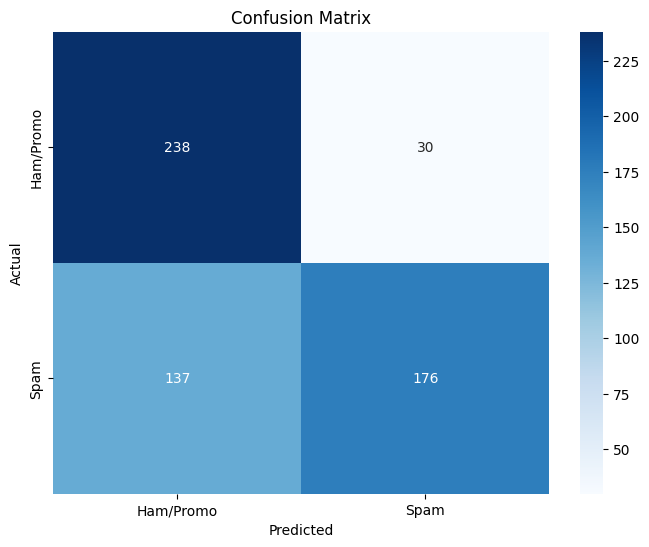

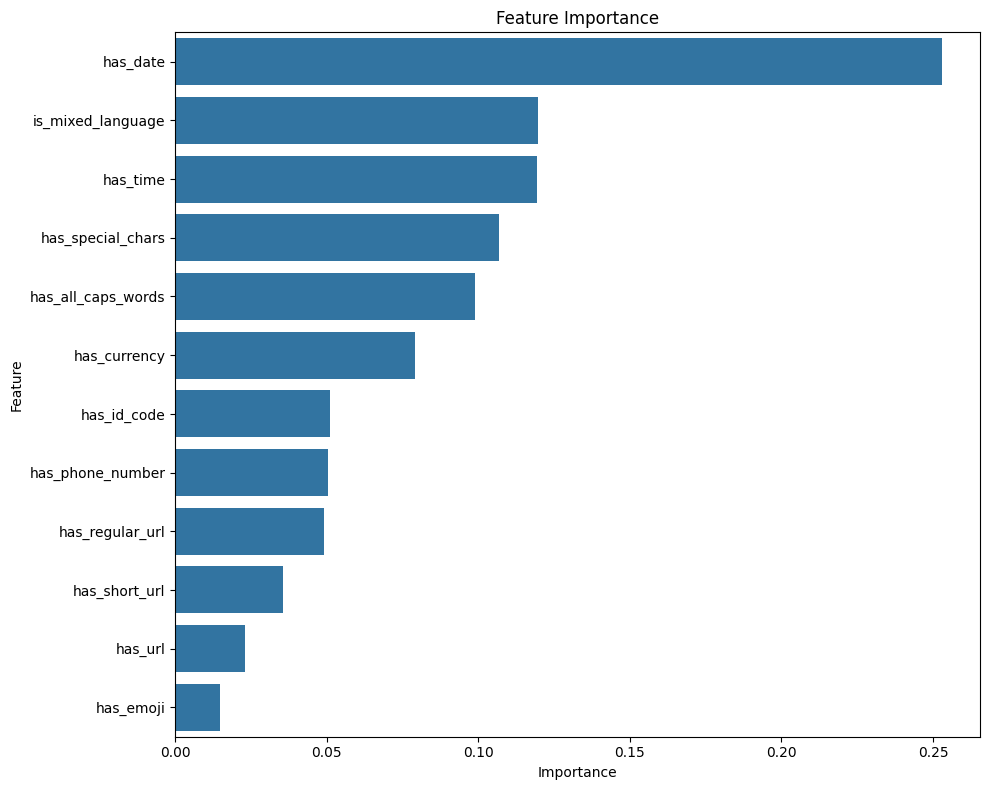

In [12]:
# Display confusion matrix
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham/Promo', 'Spam'], 
            yticklabels=['Ham/Promo', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
print("\nConfusion matrix saved as 'confusion_matrix.png'")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
print("Feature importance plot saved as 'feature_importance.png'")

In [13]:
# Display top 5 most important features
print("\nTop 5 most important features:")
print(feature_importance.head(5))



Top 5 most important features:
               Feature  Importance
8             has_date    0.252851
6    is_mixed_language    0.119705
11            has_time    0.119282
1    has_special_chars    0.106839
2   has_all_caps_words    0.098893


In [14]:
# Save the model
import pickle
with open('spam_detector_model.pkl', 'wb') as file:
    pickle.dump(rf, file)
print("\nModel saved as 'spam_detector_model.pkl'")


Model saved as 'spam_detector_model.pkl'


In [15]:
# Function to make predictions on new data
def predict_spam(model, new_data):
    # Ensure new_data has the same features as training data
    new_data = new_data[features]
    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]  # Probability of being spam
    
    results = pd.DataFrame({
        'Prediction': ['Spam' if p == 1 else 'Ham/Promo' for p in predictions],
        'Spam_Probability': probabilities
    })
    
    return results

print("\nModel training and evaluation complete!")
print("To use this model for predictions, call the predict_spam() function with new data")


Model training and evaluation complete!
To use this model for predictions, call the predict_spam() function with new data


In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
